In [1]:
# DATA

import yfinance as yf
import numpy as np
import matplotlib as mp
import pandas as pd
import os

In [2]:
# BTC-USD is the world's first and most well known cryptocurrency

BTC = yf.download("BTC-USD", start="2021-03-01", end="2022-03-01") 

[*********************100%***********************]  1 of 1 completed


In [3]:
BTC.head()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2021-02-28,46194.015625,46716.429688,43241.617188,45137.769531,45137.769531,53443887451
2021-03-01,45159.503906,49784.015625,45115.093750,49631.242188,49631.242188,53891300112
2021-03-02,49612.105469,50127.511719,47228.843750,48378.988281,48378.988281,47530897720
2021-03-03,48415.816406,52535.136719,48274.320312,50538.242188,50538.242188,53220811975
2021-03-04,50522.304688,51735.089844,47656.929688,48561.167969,48561.167969,52343816680


In [4]:
BTC.tail()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2022-02-24,37278.566406,38968.839844,34459.218750,38332.609375,38332.609375,46383802093
2022-02-25,38333.746094,39630.324219,38111.343750,39214.218750,39214.218750,26545599159
2022-02-26,39213.082031,40005.347656,38702.535156,39105.148438,39105.148438,17467554129
2022-02-27,39098.699219,39778.941406,37268.976562,37709.785156,37709.785156,23450127612
2022-02-28,37706.000000,43760.457031,37518.214844,43193.234375,43193.234375,35690014104


In [5]:
BTC.describe()

,Open,High,Low,Close,Adj Close,Volume
count,366.000000,366.000000,366.000000,366.000000,366.000000,3.660000e+02
mean,47563.351162,48790.954390,46128.776719,47544.647007,47544.647007,3.945349e+10
std,9299.927556,9393.880972,9220.833406,9293.168658,9293.168658,1.597568e+10
min,29796.285156,31006.187500,28893.621094,29807.347656,29807.347656,1.373656e+10
25%,39785.202148,40844.340820,38113.025391,39804.351562,39804.351562,2.828783e+10
50%,47134.572266,48379.882812,46244.990234,47131.816406,47131.816406,3.592005e+10
75%,56084.500000,57673.464844,54250.911133,56046.967773,56046.967773,4.764766e+10
max,67549.734375,68789.625000,66382.062500,67566.828125,67566.828125,1.263581e+11


In [6]:
BTC['Adj Close'].tail(183) # BTC_6M 

Date
2021-08-30    47054.984375
2021-08-31    47166.687500
2021-09-01    48847.027344
2021-09-02    49327.722656
2021-09-03    50025.375000
                  ...     
2022-02-24    38332.609375
2022-02-25    39214.218750
2022-02-26    39105.148438
2022-02-27    37709.785156
2022-02-28    43193.234375
Name: Adj Close, Length: 183, dtype: float64

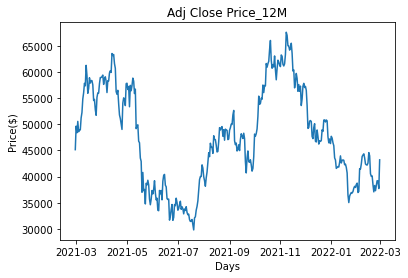

In [7]:
import matplotlib.pyplot as plt # Movement of the stock Adj Close price (12M)
fig = plt.figure()
plt.plot(BTC['Adj Close'])
plt.xlabel('Days')
plt.ylabel('Price($)')
plt.title('Adj Close Price_12M');

In [8]:
log_return_12M = np.log(BTC['Adj Close'] / BTC['Adj Close'].shift(1))
log_return_12M[:5]

Date
2021-02-28         NaN
2021-03-01    0.094901
2021-03-02   -0.025555
2021-03-03    0.043665
2021-03-04   -0.039906
Name: Adj Close, dtype: float64

Text(0, 0.5, 'log_return')

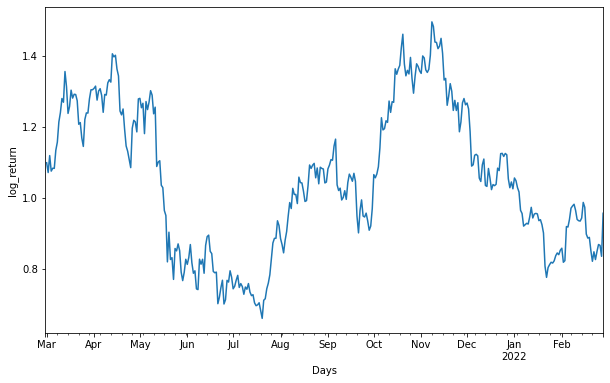

In [9]:
log_return_12M.cumsum().apply(np.exp).plot(figsize=(10, 6)),plt.xlabel('Days')
plt.ylabel('log_return')

In [10]:
BTC_12Mvol = log_return_12M.std() * np.sqrt(365)
print('The annualised volatility over 12 months is', round(BTC_12Mvol * 100,2), '%')

The annualised volatility over 12 months is 74.49 %


In [11]:
BTC_6Mvol = log_return_12M[183:-1].std() * np.sqrt(365)
print('The annualised volatility over last 6 months is', round(BTC_6Mvol * 100,2), '%')

The annualised volatility over last 6 months is 64.85 %


In [12]:
# RESEARCH METHODOLOGY

# 1. BINOMIALTREE METHOD

S0 = 46853              # spot price dated 02/04/2022
K = 49000               # strike
T = 1/12                # maturity 
r = 0.0166              # risk free rate dated 02/04/2022 
sig = 0.65              # diffusion coefficient or volatility last 6 months
N = 3                   # number of periods or number of time steps  
payoff = "put"          # payoff 

In [13]:
dT = float(T) / N                             # Delta t
u = np.exp(sig * np.sqrt(dT))                 # up factor
d = 1.0 / u                                   # down factor 

In [14]:
S = np.zeros((N + 1, N + 1))
S[0, 0] = S0
z = 1
for t in range(1, N + 1):
    for i in range(z):
        S[i, t] = S[i, t-1] * u
        S[i+1, t] = S[i, t-1] * d
    z += 1

In [15]:
S

array([[46853.        , 52213.88074106, 58188.14893478, 64845.98785614],
       [    0.        , 42042.52926318, 46853.        , 52213.88074106],
       [    0.        ,     0.        , 37725.95707522, 42042.52926318],
       [    0.        ,     0.        ,     0.        , 33852.57410019]])

In [16]:
a = np.exp(r * dT)    # risk free compound return
p = (a - d)/ (u - d)  # risk neutral up probability
q = 1.0 - p           # risk neutral down probability
p

0.4750676611666314

In [17]:
S_T = S[:,-1]
V = np.zeros((N + 1, N + 1))
if payoff =="call":
    V[:,-1] = np.maximum(S_T-K, 0.0)
elif payoff =="put":
    V[:,-1] = np.maximum(K-S_T, 0.0)
V

array([[    0.        ,     0.        ,     0.        ,     0.        ],
       [    0.        ,     0.        ,     0.        ,     0.        ],
       [    0.        ,     0.        ,     0.        ,  6957.47073682],
       [    0.        ,     0.        ,     0.        , 15147.42589981]])

In [18]:
# for European Option
for j in range(N-1, -1, -1):
    for i in range(j+1):
        V[i,j] = np.exp(-r*dT) * (p * V[i,j + 1] + q * V[i + 1,j + 1])
V

array([[ 4916.56673637,  1915.39138431,     0.        ,     0.        ],
       [    0.        ,  7636.97250284,  3650.51770382,     0.        ],
       [    0.        ,     0.        , 11251.45368881,  6957.47073682],
       [    0.        ,     0.        ,     0.        , 15147.42589981]])

In [19]:
print('European ' + payoff, str( V[0,0]))

European put 4916.566736365232


In [20]:
# 2. MONTE CARLO SIMULATION METHOD

def mcs_simulation_np(p):
    M = p
    I = p
    dt = T / M 
    S = np.zeros((M + 1, I))
    S[0] = S0 
    rn = np.random.standard_normal(S.shape) 
    for t in range(1, M + 1): 
        S[t] = S[t-1] * np.exp((r - sig ** 2 / 2) * dt + sig * np.sqrt(dt) * rn[t]) 
    return S

In [21]:
T = 1/12
r = 0.0166
sig = 0.65
S0 = 46853
K = 49000

In [22]:
S = mcs_simulation_np(10000)

In [23]:
S = np.transpose(S)
S

array([[46853.        , 47008.36901961, 46811.23625773, ...,
        45377.33916942, 45323.68302248, 45092.858245  ],
       [46853.        , 46697.72783468, 46597.2070497 , ...,
        38220.10651145, 38219.18045503, 38219.78116594],
       [46853.        , 46904.5926693 , 46789.52344872, ...,
        48380.25967554, 48305.58148048, 48301.60193943],
       ...,
       [46853.        , 46961.94218056, 47020.66999818, ...,
        53139.96531218, 53220.24957241, 53274.9204405 ],
       [46853.        , 46962.85435199, 46767.56323967, ...,
        42151.79434203, 42264.18360823, 42287.28090234],
       [46853.        , 46957.84435774, 46830.43304139, ...,
        35863.06982265, 35863.36144164, 35852.71702183]])

Text(0.5, 1.0, 'Frequency distribution of the simulated end-of-preiod values')

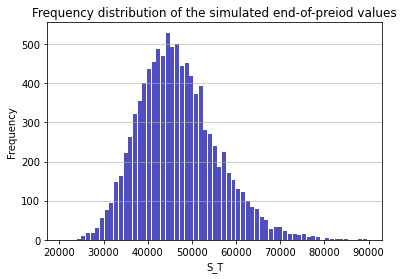

In [24]:
import matplotlib.pyplot as plt
n, bins, patches = plt.hist(x=S[:,-1], bins='auto', color='#0504aa',alpha=0.7, rwidth=0.85)

plt.grid(axis='y', alpha=0.75)
plt.xlabel('S_T')
plt.ylabel('Frequency')
plt.title('Frequency distribution of the simulated end-of-preiod values')

In [25]:
p = np.mean(np.maximum(K - S[:,-1],0))
print('European put', str(p))

European put 4777.906981522652


In [26]:
# 3. BLACK SCHOLES MODEL

import scipy.stats as si

def euro_option_bs(S, K, T, r, vol, payoff):
    
    #S: spot price
    #K: strike price
    #T: time to maturity
    #r: risk free rate
    #vol: volatility of underlying asset
    #payoff: call or put
    
    d1 = (np.log(S / K) + (r + 0.5 * vol ** 2) * T) / (vol * np.sqrt(T))
    d2 = (np.log(S / K) + (r - 0.5 * vol ** 2) * T) / (vol * np.sqrt(T))
    if payoff == "call":
        option_value = S * si.norm.cdf(d1, 0.0, 1.0) - K * np.exp(-r * T) * si.norm.cdf(d2, 0.0, 1.0)
    elif payoff == "put":
        option_value = - S * si.norm.cdf(-d1, 0.0, 1.0) + K * np.exp(-r * T) * si.norm.cdf(-d2, 0.0, 1.0)
    
    return option_value

In [27]:
euro_option_bs(46853, 49000, 1/12, 0.0166, 0.65, 'put')

4714.610755900016

In [28]:
S = np.linspace(40000,55000,20)
T = [1/252, 3/252, 1/52,3/52, 1/12] 

In [29]:
pp = np.zeros((len(T),len(S)))
for i in range(len(T)):
    for j in range(len(S)):
        pp[i,j] = euro_option_bs(S[j], 49000, T[i], 0.0166, 0.65, "put")

In [30]:
import matplotlib as mpl
import matplotlib.pyplot as plt
plt.style.use('seaborn')
mpl.rcParams['font.family'] = 'serif'
%matplotlib inline

Asset_Price, ttm = np.meshgrid(S, T)

C:\Users\agrim\AppData\Local\Temp/ipykernel_17956/56523395.py:3: MatplotlibDeprecationWarning: Calling gca() with keyword arguments was deprecated in Matplotlib 3.4. Starting two minor releases later, gca() will take no keyword arguments. The gca() function should only be used to get the current axes, or if no axes exist, create new axes with default keyword arguments. To create a new axes with non-default arguments, use plt.axes() or plt.subplot().
  ax = fig.gca(projection='3d')


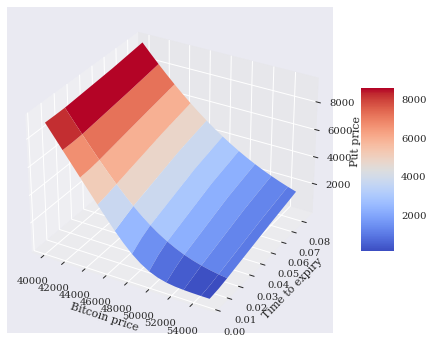

In [31]:
from mpl_toolkits.mplot3d import Axes3D
fig = plt.figure(figsize=(10, 6))
ax = fig.gca(projection='3d')
surf = ax.plot_surface(Asset_Price, ttm, pp, rstride=2, cstride=2, cmap=plt.cm.coolwarm, linewidth=0.5, antialiased=True)
ax.set_xlabel('Bitcoin price')
ax.set_ylabel('Time to expiry')
ax.set_zlabel('Put price')
fig.colorbar(surf, shrink=0.5, aspect=5);

In [32]:
# ANALYSIS

# GREEKS

# 1. DELTA: rate of change of hypothetical option value with respect to changes in the underlying asset price

def delta(S, K, T, r, q, vol, payoff):
    
    d1 = (np.log(S / K) + (r - q + 0.5 * vol ** 2) * T) / (vol * np.sqrt(T))
    d2 = (np.log(S / K) + (r - q - 0.5 * vol ** 2) * T) / (vol * np.sqrt(T))
    if payoff == "call":
        delta = np.exp(- q * T) * si.norm.cdf(d1, 0.0, 1.0)
    elif payoff == "put":
        delta =  - np.exp(- q * T) * si.norm.cdf(- d1, 0.0, 1.0)
    
    return delta

In [33]:
delta(46853, 49000, 1/12, 0.0166, 0, 0.65, 'put')

-0.554718885941155

In [34]:
S = np.linspace(40000,55000,50)
T = [1/252, 3/252, 1/52,3/52, 1/12] 

In [35]:
Delta = np.zeros((len(T),len(S)))
for i in range(len(T)):
    for j in range(len(S)):
        Delta[i,j] = delta(S[j], 49000, T[i], 0.0166,0, 0.65, "put")

C:\Users\agrim\AppData\Local\Temp/ipykernel_17956/626362431.py:2: MatplotlibDeprecationWarning: Calling gca() with keyword arguments was deprecated in Matplotlib 3.4. Starting two minor releases later, gca() will take no keyword arguments. The gca() function should only be used to get the current axes, or if no axes exist, create new axes with default keyword arguments. To create a new axes with non-default arguments, use plt.axes() or plt.subplot().
  ax = fig.gca(projection='3d')


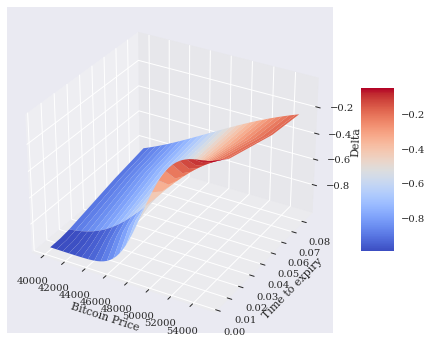

In [36]:
fig = plt.figure(figsize=(10, 6))
ax = fig.gca(projection='3d')
S, T = np.meshgrid(S, T)
surf = ax.plot_surface(S, T, Delta, rstride=2, cstride=2, cmap=plt.cm.coolwarm, linewidth=0.5, antialiased=True)
ax.set_xlabel('Bitcoin Price')
ax.set_ylabel('Time to expiry')
ax.set_zlabel('Delta')
fig.colorbar(surf, shrink=0.5, aspect=5);

In [37]:
# 2. GAMMA : rate of change in the delta with respect to changes in the underlying price

def gamma(S, K, T, r, q, vol, payoff):
    
    d1 = (np.log(S / K) + (r - q + 0.5 * vol ** 2) * T) / (vol * np.sqrt(T))
    gamma = np.exp(- r * T) * si.norm.pdf(d1, 0.0, 1.0) / (vol * S * np.sqrt(T))
    
    return gamma

In [38]:
gamma(46853, 49000, 1/12, 0.0166, 0, 0.65, 'put')

4.488881794523577e-05

In [39]:
S = np.linspace(40000,55000,50)
T = [1/252, 3/252, 1/52,3/52, 1/12]

In [40]:
Gamma = np.zeros((len(T),len(S)))
for i in range(len(T)):
    for j in range(len(S)):
        Gamma[i,j] = gamma(S[j], 49000, T[i], 0.0166,0, 0.65, "put")

C:\Users\agrim\AppData\Local\Temp/ipykernel_17956/2192843767.py:2: MatplotlibDeprecationWarning: Calling gca() with keyword arguments was deprecated in Matplotlib 3.4. Starting two minor releases later, gca() will take no keyword arguments. The gca() function should only be used to get the current axes, or if no axes exist, create new axes with default keyword arguments. To create a new axes with non-default arguments, use plt.axes() or plt.subplot().
  ax = fig.gca(projection='3d')


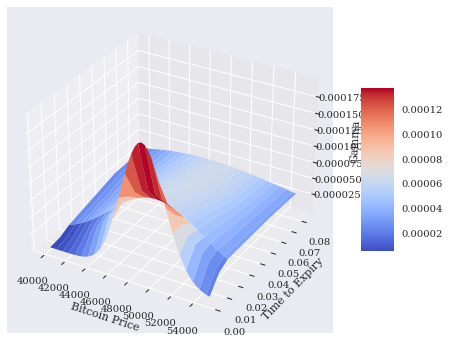

In [41]:
fig = plt.figure(figsize=(10, 6))
ax = fig.gca(projection='3d')
S, T = np.meshgrid(S, T)
surf = ax.plot_surface(S, T, Gamma, rstride=2, cstride=2, cmap=plt.cm.coolwarm, linewidth=0.5, antialiased=True)
ax.set_xlabel('Bitcoin Price')
ax.set_ylabel('Time to Expiry')
ax.set_zlabel('Gamma')
fig.colorbar(surf, shrink=0.5, aspect=5);

In [42]:
# 3. SPEED: measures the rate of change in Gamma with respect to changes in the underlying price


def speed(S, K, T, r, q, vol, payoff):
    
    d1 = (np.log(S / K) + (r - q + 0.5 * vol ** 2) * T) / (vol * np.sqrt(T))
    speed = - np.exp(- q * T) * si.norm.pdf(d1, 0.0, 1.0) / ((vol **2) * (S**2) * np.sqrt(T)) * (d1 + vol * np.sqrt(T))
    
    return speed

In [43]:
speed(46853, 49000, 1/12, 0.0166, 0, 0.65, 'put')

-7.386822805633465e-11

In [44]:
S = np.linspace(40000,55000,50)
T = [1/252, 3/252, 1/52,3/52, 1/12]

In [45]:
Speed = np.zeros((len(T),len(S)))
for i in range(len(T)):
    for j in range(len(S)):
        Speed[i,j] = speed(S[j], 49000, T[i], 0.0166,0, 0.65, "put")

C:\Users\agrim\AppData\Local\Temp/ipykernel_17956/422378739.py:2: MatplotlibDeprecationWarning: Calling gca() with keyword arguments was deprecated in Matplotlib 3.4. Starting two minor releases later, gca() will take no keyword arguments. The gca() function should only be used to get the current axes, or if no axes exist, create new axes with default keyword arguments. To create a new axes with non-default arguments, use plt.axes() or plt.subplot().
  ax = fig.gca(projection='3d')


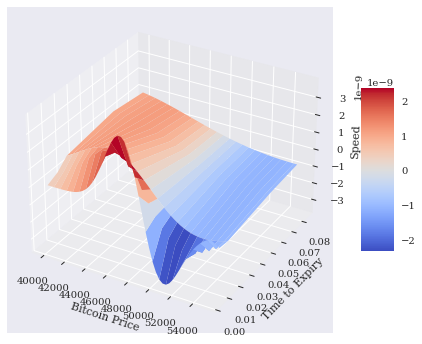

In [46]:
fig = plt.figure(figsize=(10, 6))
ax = fig.gca(projection='3d')
S, T = np.meshgrid(S, T)
surf = ax.plot_surface(S, T, Speed, rstride=2, cstride=2, cmap=plt.cm.coolwarm, linewidth=0.5, antialiased=True)
ax.set_xlabel('Bitcoin Price')
ax.set_ylabel('Time to Expiry')
ax.set_zlabel('Speed')
fig.colorbar(surf, shrink=0.5, aspect=5);

In [47]:
# 4. THETA: measures the sensitivity of the value of the derivative to the passage of time (see Option time value): the "time decay"

def theta(S, K, T, r, q, vol, payoff):
    
    d1 = (np.log(S / K) + (r - q + 0.5 * vol ** 2) * T) / (vol * np.sqrt(T))
    d2 = (np.log(S / K) + (r - q - 0.5 * vol ** 2) * T) / (vol * np.sqrt(T))
    if payoff == "call":
        theta = vol * S * np.exp(- q * T) * si.norm.pdf(d1, 0.0, 1.0) / (2 * np.sqrt(T)) - q * S * np.exp(-q * T) * si.norm.cdf(d1, 0.0, 1.0) + r * K * np.exp(-r * T) * si.norm.cdf(d2, 0.0, 1.0)
    elif payoff == "put":
        theta = vol * S * np.exp(- q * T) * si.norm.pdf(-d1, 0.0, 1.0) / (2 * np.sqrt(T)) - q * S * np.exp(-q * T) * si.norm.cdf(-d1, 0.0, 1.0) + r * K * np.exp(-r * T) * si.norm.cdf(-d2, 0.0, 1.0)
    
    return theta

In [48]:
theta(46853, 49000, 1/12, 0.0166, 0, 0.65, 'put')

21355.111906788712

In [49]:
S = np.linspace(40000,55000,50)
T = [1/252, 3/252, 1/52,3/52, 1/12]

In [50]:
Theta = np.zeros((len(T),len(S)))
for i in range(len(T)):
    for j in range(len(S)):
        Theta[i,j] = theta(S[j], 49000, T[i], 0.0166,0, 0.65, "put")

C:\Users\agrim\AppData\Local\Temp/ipykernel_17956/3065579276.py:2: MatplotlibDeprecationWarning: Calling gca() with keyword arguments was deprecated in Matplotlib 3.4. Starting two minor releases later, gca() will take no keyword arguments. The gca() function should only be used to get the current axes, or if no axes exist, create new axes with default keyword arguments. To create a new axes with non-default arguments, use plt.axes() or plt.subplot().
  ax = fig.gca(projection='3d')


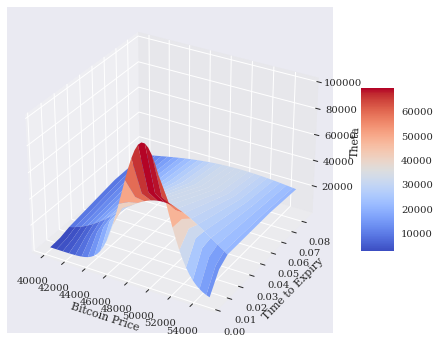

In [51]:
fig = plt.figure(figsize=(10, 6))
ax = fig.gca(projection='3d')
S, T = np.meshgrid(S, T)
surf = ax.plot_surface(S, T, Theta, rstride=2, cstride=2, cmap=plt.cm.coolwarm, linewidth=0.5, antialiased=True)
ax.set_xlabel('Bitcoin Price')
ax.set_ylabel('Time to Expiry')
ax.set_zlabel('Theta')
fig.colorbar(surf, shrink=0.5, aspect=5);

In [52]:
# 5. VEGA: measures sensitivity to volatility

def vega(S, K, T, r, q, vol, payoff):
    
    d1 = (np.log(S / K) + (r - q + 0.5 * vol ** 2) * T) / (vol * np.sqrt(T))
    vega = S * np.sqrt(T) * np.exp(-q * T) * si.norm.pdf(d1, 0.0, 1.0)
    
    return vega

In [53]:
vega(46853, 49000, 1/12, 0.0166, 0, 0.65, 'put')

5344.977261142296

In [54]:
S = np.linspace(40000,55000,50)
T = [1/252, 3/252, 1/52,3/52, 1/12]

In [55]:
Vega = np.zeros((len(T),len(S)))
for i in range(len(T)):
    for j in range(len(S)):
        Vega[i,j] = vega(S[j], 49000, T[i], 0.0166,0, 0.65, "put")

C:\Users\agrim\AppData\Local\Temp/ipykernel_17956/46214503.py:2: MatplotlibDeprecationWarning: Calling gca() with keyword arguments was deprecated in Matplotlib 3.4. Starting two minor releases later, gca() will take no keyword arguments. The gca() function should only be used to get the current axes, or if no axes exist, create new axes with default keyword arguments. To create a new axes with non-default arguments, use plt.axes() or plt.subplot().
  ax = fig.gca(projection='3d')


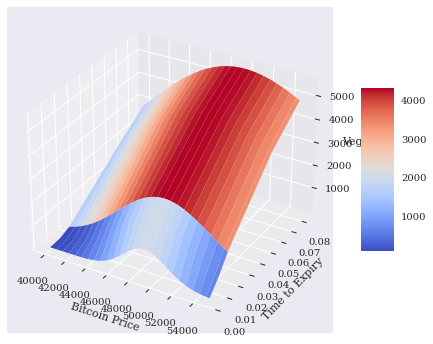

In [56]:
fig = plt.figure(figsize=(10, 6))
ax = fig.gca(projection='3d')
S, T = np.meshgrid(S, T)
surf = ax.plot_surface(S, T, Vega, rstride=2, cstride=2, cmap=plt.cm.coolwarm, linewidth=0.5, antialiased=True)
ax.set_xlabel('Bitcoin Price')
ax.set_ylabel('Time to Expiry')
ax.set_zlabel('Vega')
fig.colorbar(surf, shrink=0.5, aspect=5);

In [57]:
# 6. RHO :measures sensitivity to the interest rate

def rho(S, K, T, r, q, vol, payoff):
    
    d1 = (np.log(S / K) + (r - q + 0.5 * vol ** 2) * T) / (vol * np.sqrt(T))
    d2 = (np.log(S / K) + (r - q - 0.5 * vol ** 2) * T) / (vol * np.sqrt(T))
    if payoff == "call":
        rho =  K * T * np.exp(-r * T) * si.norm.cdf(d2, 0.0, 1.0)
    elif payoff == "put":
        rho = - K * T * np.exp(-r * T) * si.norm.cdf(-d2, 0.0, 1.0)
    
    return rho

In [59]:
rho(46853, 49000, 1/12, 0.0166,0, 0.65, "put")

-2558.737893241746

In [60]:
S = np.linspace(40000,55000,50)
T = [1/252, 3/252, 1/52,3/52, 1/12]

In [61]:
Rho = np.zeros((len(T),len(S)))
for i in range(len(T)):
    for j in range(len(S)):
        Rho[i,j] = rho(S[j], 49000, T[i], 0.0166,0, 0.65, "put")

C:\Users\agrim\AppData\Local\Temp/ipykernel_17956/659344260.py:2: MatplotlibDeprecationWarning: Calling gca() with keyword arguments was deprecated in Matplotlib 3.4. Starting two minor releases later, gca() will take no keyword arguments. The gca() function should only be used to get the current axes, or if no axes exist, create new axes with default keyword arguments. To create a new axes with non-default arguments, use plt.axes() or plt.subplot().
  ax = fig.gca(projection='3d')


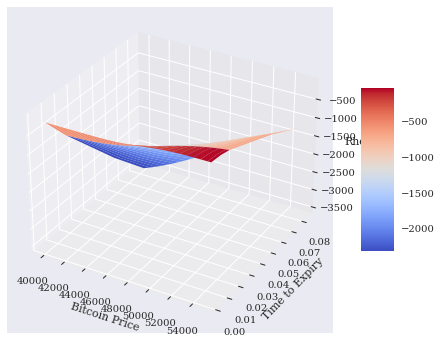

In [62]:
fig = plt.figure(figsize=(10, 6))
ax = fig.gca(projection='3d')
S, T = np.meshgrid(S, T)
surf = ax.plot_surface(S, T, Rho, rstride=2, cstride=2, cmap=plt.cm.coolwarm, linewidth=0.5, antialiased=True)
ax.set_xlabel('Bitcoin Price')
ax.set_ylabel('Time to Expiry')
ax.set_zlabel('Rho')
fig.colorbar(surf, shrink=0.5, aspect=5);